In [33]:
setprecision(3000);

In [34]:
function accuracy(t)
    e = ep*exp(BigFloat(2.3025851)*(BigFloat(1.001)*t-BigFloat(20)))
    ac = (0.29803-log10(e))/0.30103;
    return max(round(Int,ac),128);
end

accuracy (generic function with 1 method)

In [35]:
function order()
    M=450;
    return M+1;
end

order (generic function with 1 method)

In [36]:
function Ep(t)
    return ep*exp(BigFloat(2.3025851)*(BigFloat(1.001)*t-BigFloat(15)))
end

Ep (generic function with 1 method)

In [37]:
function steps(Dfm,Co)
    h = Co*abs(Dfm)^(BigFloat(-1)/BigFloat(order()-1))
    return min(h,BigFloat(1)/BigFloat(10))
end

steps (generic function with 1 method)

In [38]:
function goonm(mor)
    sgo = BigFloat(1)
    for i in 1:mor
        sgo = sgo*BigFloat(i)
    end
    return (sgo)^(BigFloat(1)/BigFloat(mor))
end 

goonm (generic function with 1 method)

In [39]:
function goon(mor,ep)
    sgo = BigFloat(1)
    for i in 1:mor
        sgo = sgo*BigFloat(i)
    end
    return (ep*sgo)^(BigFloat(1)/BigFloat(mor))
end 

goon (generic function with 1 method)

In [40]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [41]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [42]:
function multi(hstep)
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*hstep/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [43]:
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,z,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),z[1:end]))
end 

Sumxyz (generic function with 1 method)

In [44]:
function Talor(x,y,z,Cki,Co)
    for k in 1:order()-1
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    end
    
    return x,y,z,min(steps(x[end],Co),steps(y[end],Co),steps(z[end],Co))
end

Talor (generic function with 1 method)

In [45]:
function Iteration(x,y,z,Cki,Tin,Tinf)
    stl = 0;
    for st in 1:Times
    
        Co = Mo*Ep(Tin)^(BigFloat(1)/BigFloat(order()))
        setprecision(accuracy(Tin))
        
        x,y,z,hstep = Talor(x,y,z,Cki,Co)
        
        if Tin + hstep < Tinf
            
            Dmulti = multi(hstep);
            x[1] = sum(x[1:end].*Dmulti[1:end])
            y[1] = sum(y[1:end].*Dmulti[1:end])
            z[1] = sum(z[1:end].*Dmulti[1:end])
            Lorenz[st,:] = [x[1],y[1],z[1]] 
            Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
        
            Tin = Tin + hstep
            if mod(st,500) == 0
            println(st,")","Time=",convert.(Float16,Tin),": ",Lorenzf[st,:]," (Ep: ",convert(Float16,log10(abs(Ep(Tin)))),") (Mp: ",accuracy(Tin),")")
            end
        else
            hstep = Tinf - Tin
            Dmulti = multi(hstep);
            x[1] = sum(x[1:end].*Dmulti[1:end])
            y[1] = sum(y[1:end].*Dmulti[1:end])
            z[1] = sum(z[1:end].*Dmulti[1:end])
            Lorenz[st,:] = [x[1],y[1],z[1]] 
            Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
        
            Tin = Tinf
            println(st,")","Time=",convert.(Float16,Tin),": ",Lorenzf[st,:]," (Ep: ",convert(Float16,log10(abs(Ep(Tin)))),") (Mp: ",accuracy(Tin),")")
            stl = st
            break;
        end
        
    end
    
    return Lorenz,stl
    
end

Iteration (generic function with 1 method)

In [46]:
Times = 1500000;      
Tin = BigFloat(0);
Tinf = BigFloat(500);

ep = BigFloat(10)^(-20-1.001*Tinf)
Mo = goonm(order())

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())

Lorenz = Array{BigFloat}(undef,Times,3);
Ros = Array{BigFloat}(undef,Times,3);
Lorenzf = Array{Float32}(undef,Times,3);
Dmulti = Array{BigFloat}(undef,1,order());
Cki = Array{BigFloat}(undef,order()-1,order()-1);

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

Cki = DJCh();
println("ep0: ",convert(Float16,log10(abs(ep))))

ep0: -520.5


In [47]:
Ros,st = Iteration(x,y,z,Cki,Tin,Tinf);

500)Time=6.6: Float32[-9.743408, -9.69083, 18.12699] (Ep: -529.0) (Mp: 1775)
1000)Time=13.04: Float32[2.4885373, -0.3981909, 20.61781] (Ep: -522.5) (Mp: 1753)
1500)Time=20.17: Float32[-3.628697, -4.6451564, 16.573338] (Ep: -515.5) (Mp: 1729)
2000)Time=27.36: Float32[-4.8579664, -6.3770733, 8.118836] (Ep: -508.0) (Mp: 1706)
2500)Time=34.66: Float32[-1.0090473, -1.3965288, 12.711905] (Ep: -500.8) (Mp: 1681)
3000)Time=42.5: Float32[1.3144883, 1.0324874, 13.3050785] (Ep: -493.0) (Mp: 1655)
3500)Time=50.56: Float32[-3.1094873, -3.8609095, 10.533933] (Ep: -485.0) (Mp: 1628)
4000)Time=58.56: Float32[-13.566902, -15.200725, 17.774254] (Ep: -476.8) (Mp: 1602)
4500)Time=67.5: Float32[11.239898, 8.331547, 24.225311] (Ep: -468.0) (Mp: 1572)
5000)Time=76.4: Float32[2.8788579, 4.423548, 18.022581] (Ep: -459.0) (Mp: 1542)
5500)Time=86.06: Float32[1.9079981, 2.1389396, 11.250092] (Ep: -449.2) (Mp: 1510)
6000)Time=95.75: Float32[7.8266144, 8.099908, 16.052935] (Ep: -439.5) (Mp: 1478)
6500)Time=106.75: 

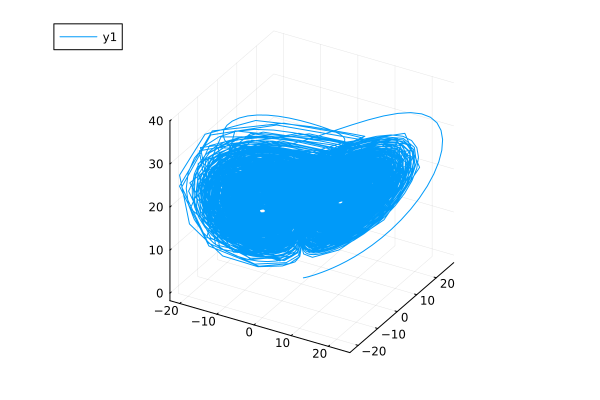

In [48]:
using Plots; 
plot(Ros[1:st,1],Ros[1:st,2],Ros[1:st,3])